In [1]:
import numpy as np
import pandas as pd
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\VEDANSHI\Downloads\breast-cancer.csv")

In [3]:
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


INFORMATION RELATED TO DATASET

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

STATISTICAL FACTS

In [4]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


VALUE COUNTS FOR THE TARGET COLUMN

In [5]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

CHECKING FOR NULL VALUES

In [6]:
df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

EDA

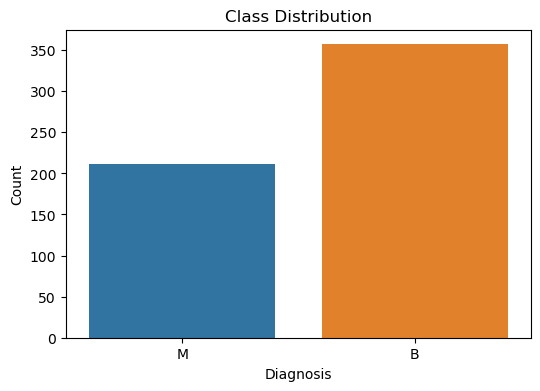

In [3]:
# 1. Class Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='diagnosis', data=df)
plt.title('Class Distribution')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

INSIGHT:The above bar chart shows which type of tumor is more in number .Here the B(Benign tumor) has more count as compared to M(Malignant tumor)

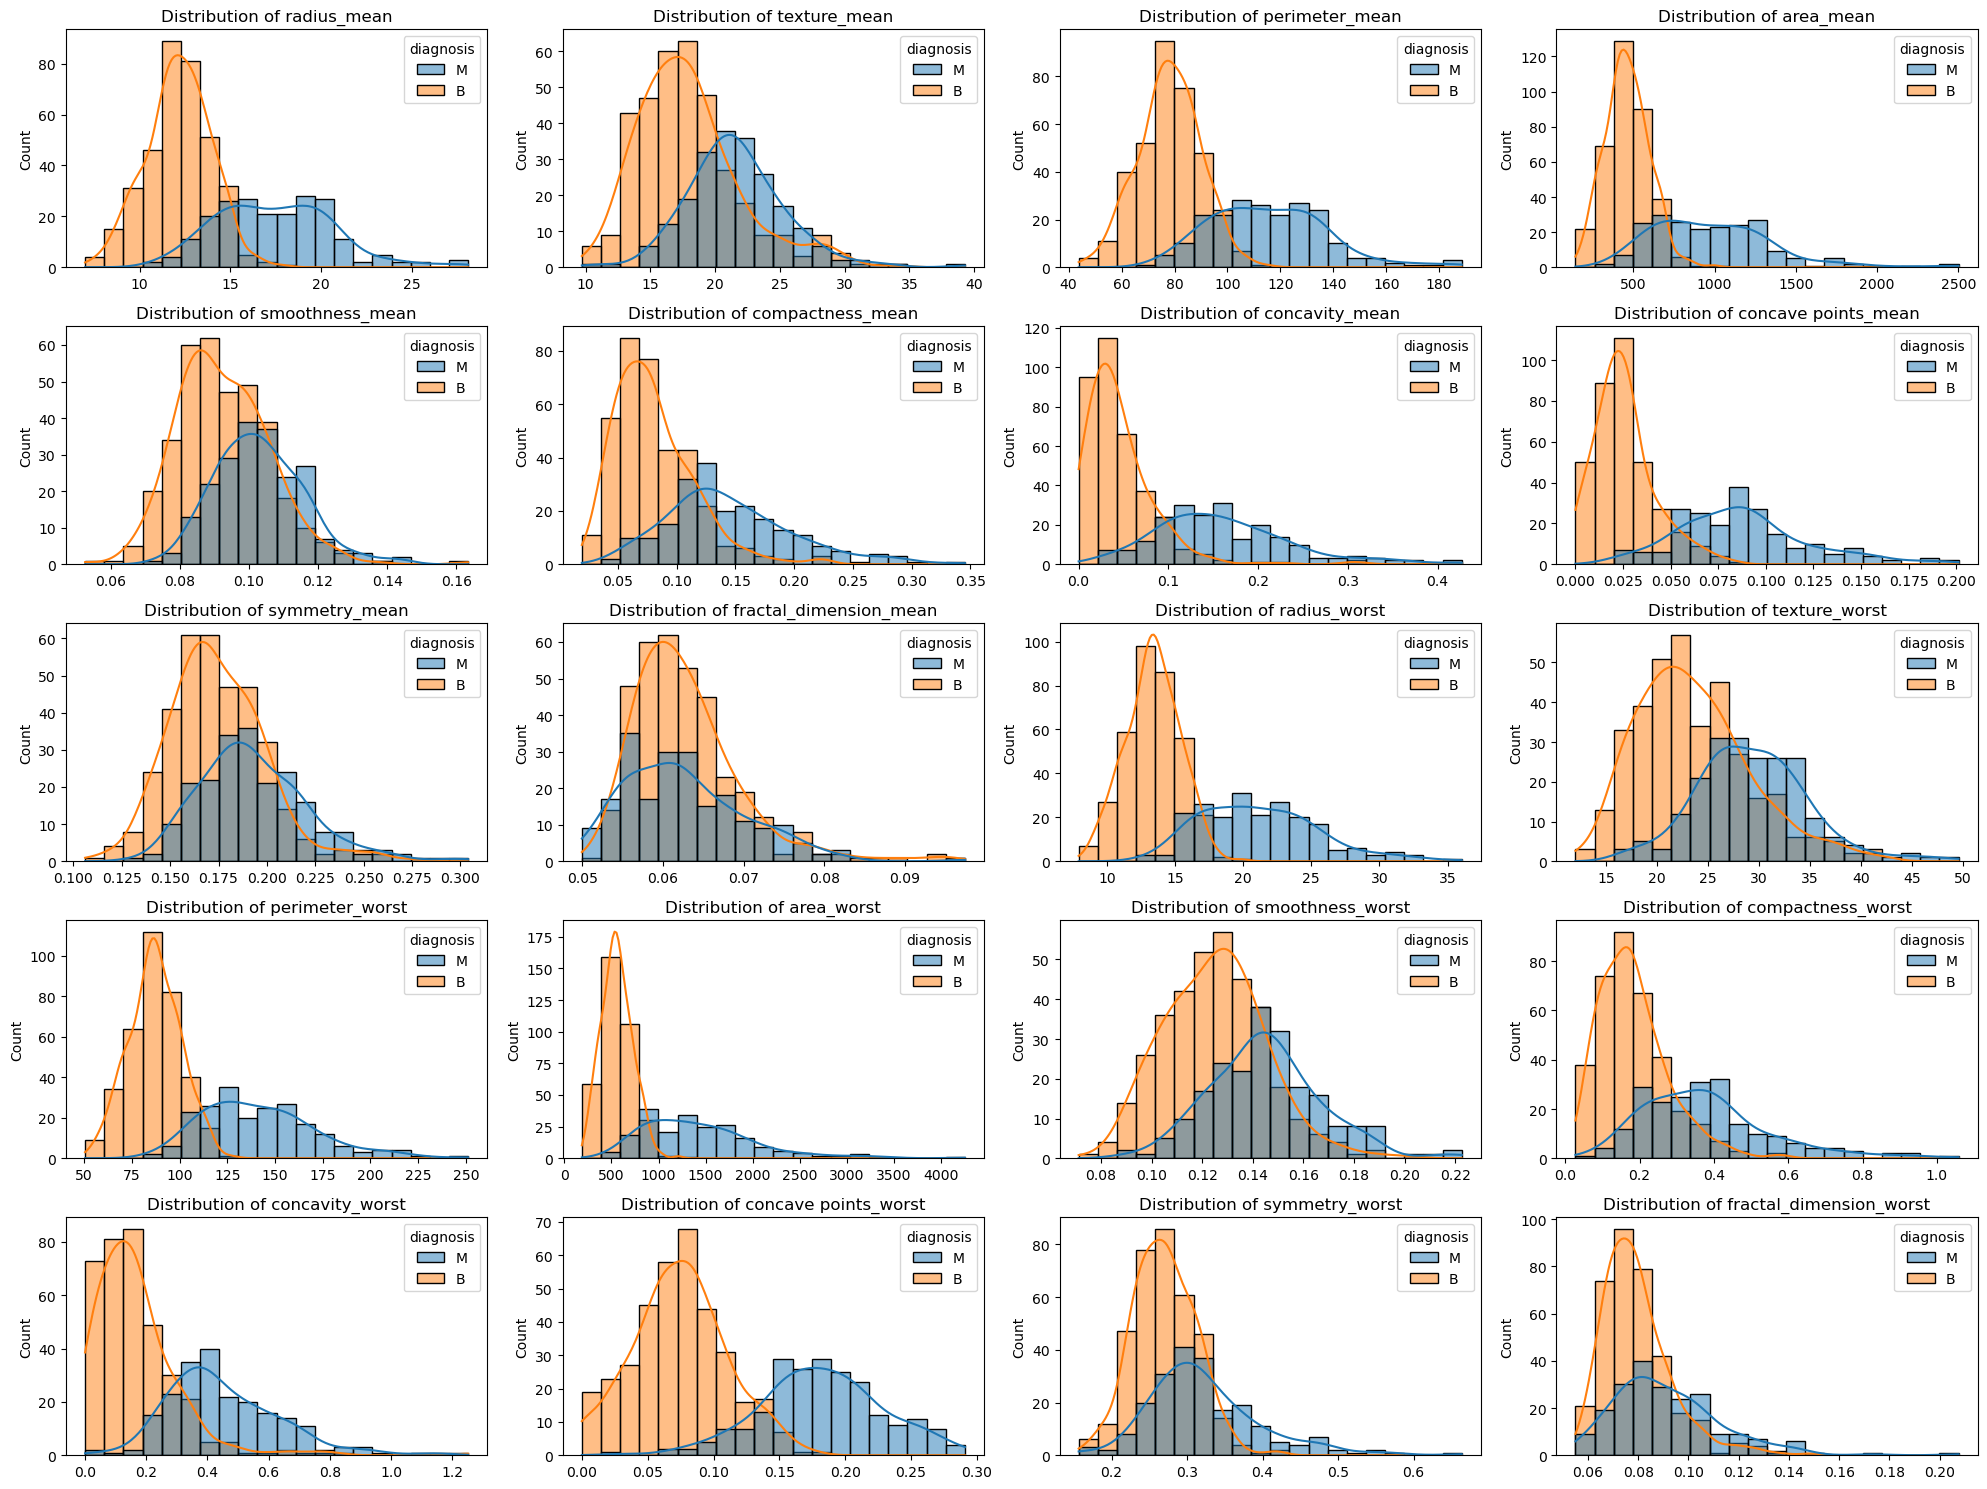

In [6]:
parameters = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 
              'smoothness_mean', 'compactness_mean', 'concavity_mean', 
              'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
              'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 
              'smoothness_worst', 'compactness_worst', 'concavity_worst', 
              'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']

# Plot histograms for each parameter with separate distributions for malignant and benign tumors
plt.figure(figsize=(20, 15))
for i, param in enumerate(parameters, 1):
    plt.subplot(5, 4, i)
    sns.histplot(data=df, x=param, hue='diagnosis', kde=True, bins=20)
    plt.title(f'Distribution of {param}')
    plt.xlabel('')
plt.tight_layout()
plt.show()

INSIGHT: THE ABOVE HISTOGRAMS SHOWS VARIATIONS FOR EACH TUMOR M & B .

HERE LIKE IN FIRST CASE THE DISTRIBUTION FOR RADIUS_MEAN FOR B MOSTLY LIE BETWEEN 10 TO 15 WHILE M LIES BETWEEN 10 TO 25 & IT ALSO SHOWS THAT MAXIMUM NO OF TUMOR B HAS A RADIUS MEAN AROUND 12 OR 12.5. 

SIMILARLY FOR REST OF THE CASES

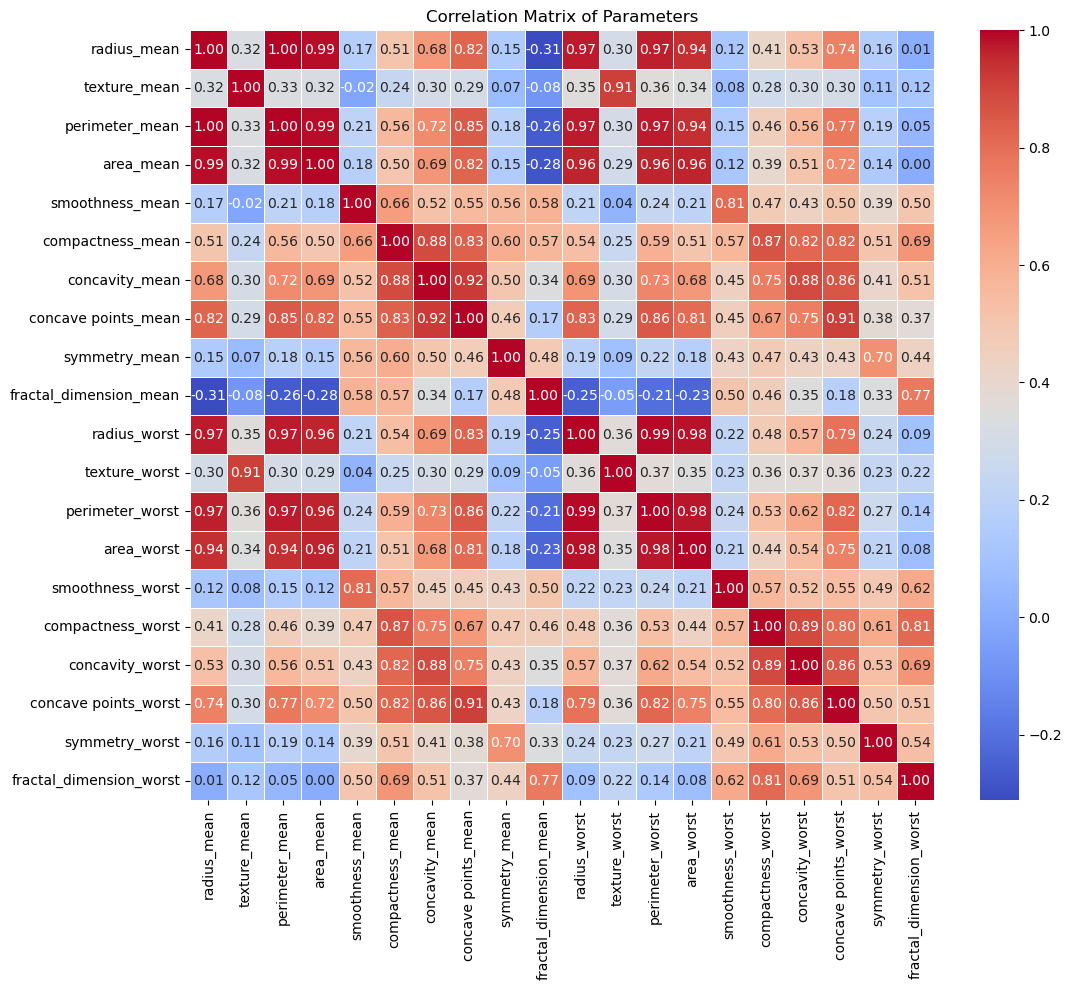

In [7]:
parameters = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 
              'smoothness_mean', 'compactness_mean', 'concavity_mean', 
              'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
              'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 
              'smoothness_worst', 'compactness_worst', 'concavity_worst', 
              'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']

# Compute the correlation matrix
correlation_matrix = df[parameters].corr()

# Generate a heatmap for the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Parameters')
plt.show()


INSIGHT: THE ABOVE HEAT MAP SHOWS CORRELATION AMONG DIFFERENT PARAMETERS THAT RESULTS IN THE TYPE OF TUMOR PRESENT.

HERE THE "RED" COLOR BOXES INDENTIFY HIGH CORRELATION THAN THE "BLUE ONES".

THE COLOR CHANGES AS FROM RED TO BLUE AS CORRELATION DECREASES IT GETS CLOSE TO BLUE.

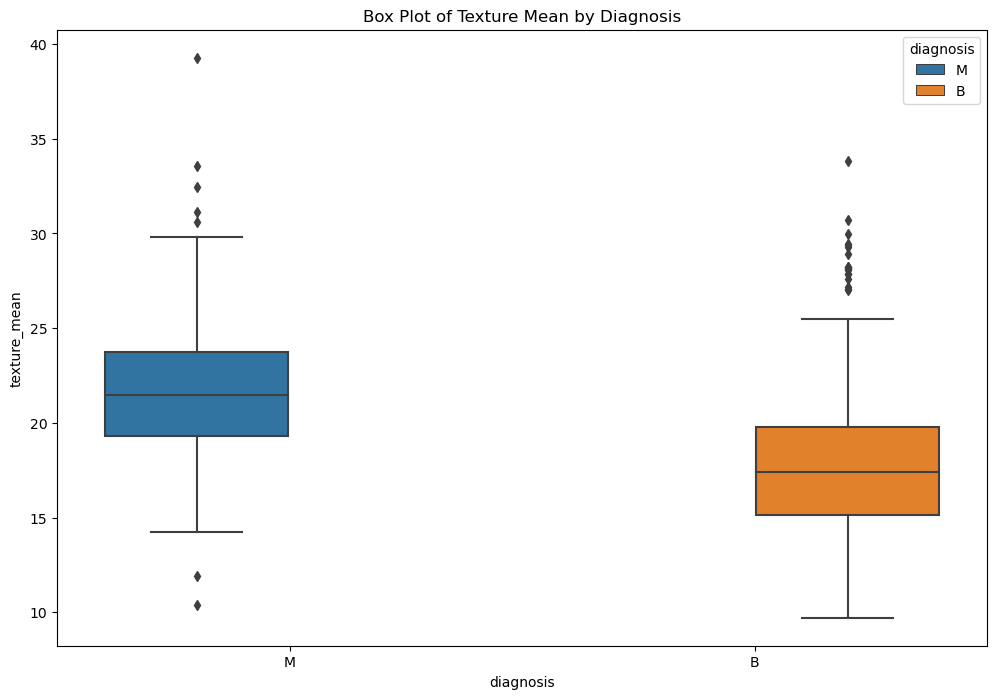

In [10]:
# Box Plot
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='diagnosis', y='texture_mean', hue='diagnosis')
plt.title('Box Plot of Texture Mean by Diagnosis')
plt.show()


INSIGHT: THE ABOVE BOX PLOT SHOWS HOT THE TEXTURE_MEAN IS RELATED WITH THE DIAGNOSIS(B or M) 

THE OUTER DOTS INDICATES OUTLIERS WHICH BASICALLY MEANS CERTAIN VALUES HAVE DEVIATED FROM ITS MEAN POSITION.

HERE MAJORITY LIES BETWEEN 20 to 25 FOR THE BLUE(M-malignant) PLOT AND  15 to 20 FOR ORANGE(B-benign)

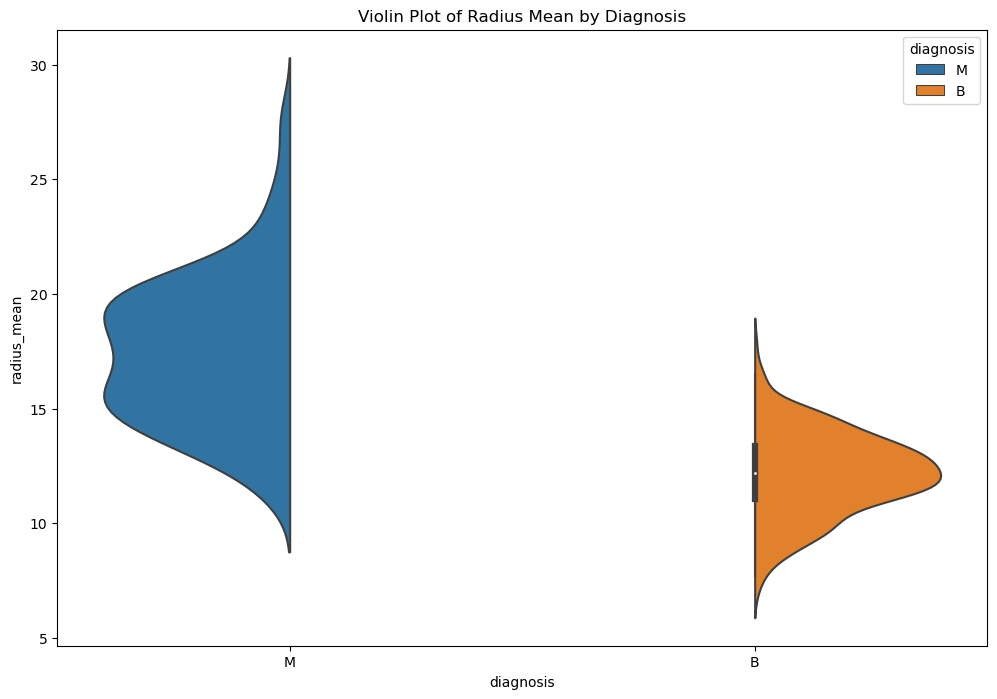

In [11]:
# Violin Plot
plt.figure(figsize=(12, 8))
sns.violinplot(data=df, x='diagnosis', y='radius_mean', hue='diagnosis', split=True)
plt.title('Violin Plot of Radius Mean by Diagnosis')
plt.show()


THE ABOVE VIOLIN PLOT SHOWS RELATIONSHIP BETWEEN BENIGN & MALIGNANT TUMOR
HERE THE M(MALIGNANT) HAS A BROADER SPREAD INDICATING WIDE RANGE OF VALUES IN RADIUS_MEAN THAN B(BENIGN).